<a href="https://colab.research.google.com/github/mujahidali88094/Artificial-Intelligence-Course/blob/main/UrduOCR_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from scipy.io import loadmat
import tensorflow.keras as ks
import numpy as np

In [ ]:
#!git clone https://github.com/cloudy-sfu/Character-Recognition.git

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
Index_Mapping = {
  0 : "ا",
  1 : "آ",
  2 : "ب",
  3 : "پ",
  4 : "ت",
  5 : "ٹ",
  6 : "ث",
  7 : "ج",
  8 : "چ",
  9 : "ح",
  10 : "خ",
  11 : "د",
  12 : "ڈ",
  13 : "ذ",
  14 : "ر",
  15 : "ڑ",
  16 : "ز",
  17 : "ژ",
  18 : "س",
  19 : "ش",
  20 : "ص",
  21 : "ض",
  22 : "ط",
  23 : "ظ",
  24 : "ع",
  25 : "غ",
  26 : "ف",
  27 : "ق",
  28 : "ک",
  29 : "گ",
  30 : "ل",
  31 : "م",
  32 : "ن",
  33 : "ں",
  34 : "و",
  35 : "ھ",
  36 : "ہ",
  37 : "ء",
  38 : "ی",
  39 : "ے"
}

## Load Data

In [ ]:
urdu_dataset = np.load('/content/gdrive/MyDrive/kaggle/uhat_dataset.npz')
    
X_train = urdu_dataset['x_chars_train']
Y_train = urdu_dataset['y_chars_train']
X_valid = urdu_dataset['x_chars_test']
Y_valid = urdu_dataset['y_chars_test']

print(X_train.shape)
print(X_valid.shape)

(28328, 28, 28)
(4880, 28, 28)


## Normalizing

In [ ]:
X_train = X_train / 255
X_valid = X_valid / 255

## Model

In [ ]:
_shape = (28, 28, 1)
net = ks.Sequential()
net.add(ks.layers.Conv2D(16, kernel_size=(3, 3), activation='relu',
                          input_shape=_shape))
net.add(ks.layers.MaxPooling2D((2, 2)))
net.add(ks.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
net.add(ks.layers.MaxPooling2D((2, 2)))
net.add(ks.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
net.add(ks.layers.Flatten())
net.add(ks.layers.Dense(128, activation='relu'))
net.add(ks.layers.Dropout(0.1))
net.add(ks.layers.Dense(40, activation="sigmoid"))
net.compile(optimizer='adam',
            loss=ks.losses.sparse_categorical_crossentropy,
            metrics=['accuracy'])

## Training

In [ ]:
history = net.fit(X_train[:, :, :, np.newaxis], Y_train, validation_data=(X_valid, Y_valid), epochs=40, batch_size=2000)
net.save("model_1.h5")

Epoch 1/40
15/15 [==============================] - 1s 39ms/step - loss: 3.5630 - accuracy: 0.0882 - val_loss: 3.2654 - val_accuracy: 0.1357
Epoch 2/40
15/15 [==============================] - 0s 27ms/step - loss: 2.7983 - accuracy: 0.2230 - val_loss: 2.1653 - val_accuracy: 0.3758
Epoch 3/40
15/15 [==============================] - 0s 28ms/step - loss: 2.1356 - accuracy: 0.3717 - val_loss: 1.7421 - val_accuracy: 0.4910
Epoch 4/40
15/15 [==============================] - 0s 25ms/step - loss: 1.7709 - accuracy: 0.4731 - val_loss: 1.4494 - val_accuracy: 0.5613
Epoch 5/40
15/15 [==============================] - 0s 25ms/step - loss: 1.5149 - accuracy: 0.5432 - val_loss: 1.2344 - val_accuracy: 0.6234
Epoch 6/40
15/15 [==============================] - 0s 25ms/step - loss: 1.3120 - accuracy: 0.5961 - val_loss: 1.0551 - val_accuracy: 0.6818
Epoch 7/40
15/15 [==============================] - 0s 25ms/step - loss: 1.1466 - accuracy: 0.6441 - val_loss: 0.9049 - val_accuracy: 0.7156
Epoch 8/40
15

## Testing

In [ ]:
Y_pred = net.predict(X_valid[:, :, :, np.newaxis])
Y_pred = np.argmax(Y_pred, axis=1)
print(X_valid.shape)
net.summary()

(4880, 28, 28)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 3, 3, 32)          9248      
                                                                 
 flatten_5 (Flatten)         (None, 288

## Accuracy

In [ ]:
acc = np.mean(Y_pred == Y_valid)
print("Accuracy in testing set:", acc)

Accuracy in testing set: 0.9147540983606557


## Timeline

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


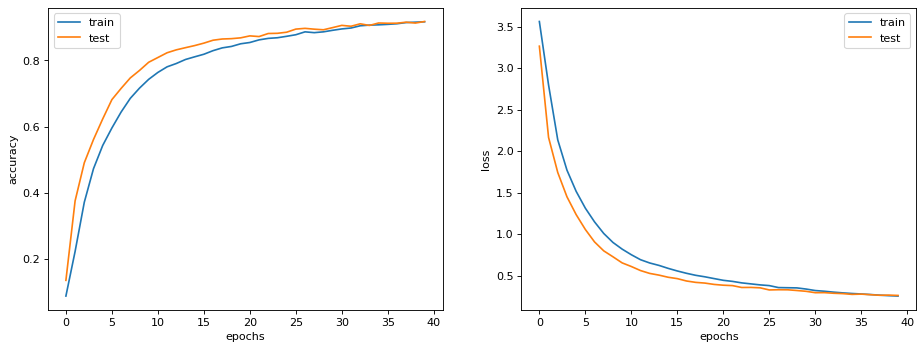

In [ ]:
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure

print(history.history.keys())

figure(figsize=(14, 5), dpi=80)

sp = plot.subplot(1, 2, 1)
sp.set(xlabel='epochs',ylabel='accuracy')
plot.plot(history.history['accuracy'], label='train')
plot.plot(history.history['val_accuracy'], label='test')
plot.legend()

sp=plot.subplot(1, 2, 2)
sp.set(xlabel='epochs',ylabel='loss')
plot.plot(history.history['loss'], label='train')
plot.plot(history.history['val_loss'], label='test')
plot.legend()


## Modal Class 
for reuse

In [ ]:

class Model:
    def __init__(self):
        _shape = (28, 28, 1)
        net = ks.Sequential()
        net.add(ks.layers.Conv2D(16, kernel_size=(3, 3), activation='relu',
                                 input_shape=_shape))
        
        net.add(ks.layers.MaxPooling2D((2, 2)))
        net.add(ks.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
        net.add(ks.layers.MaxPooling2D((2, 2)))
        net.add(ks.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
        net.add(ks.layers.Flatten())
        net.add(ks.layers.Dense(128, activation='relu'))
        net.add(ks.layers.Dropout(0.1))
        net.add(ks.layers.Dense(40, activation="sigmoid"))
        net.compile(optimizer='adam',
                    loss=ks.losses.sparse_categorical_crossentropy,
                    metrics=['accuracy'])
        self.net = net

    def train(self, X, Y):
        history = self.net.fit(X[:, :, :, np.newaxis], Y, epochs=40, batch_size=2000)
        self.net.save("model_1.h5")
        return history

    def predict(self, X):
        Y_pred = self.net.predict(X[:, :, :, np.newaxis])
        Y_pred = np.argmax(Y_pred, axis=1)
        return Y_pred


if __name__ == "__main__":
  # do stuff here
  print("Hello World")
  # to reload weights from saved model use following line
  # model.net.load_weights('model_1.h5')

  


Hello World


Prediction:  ض
Actual Result


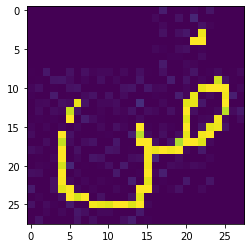

Prediction:  ش
Actual Result


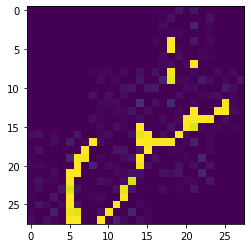

Prediction:  ز
Actual Result


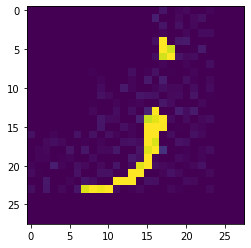

Prediction:  ژ
Actual Result


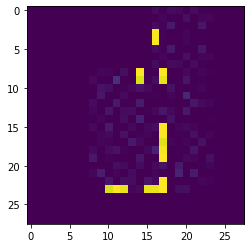

Prediction:  ک
Actual Result


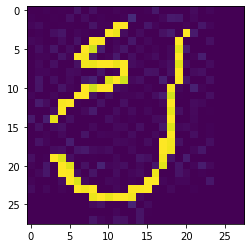

Prediction:  ش
Actual Result


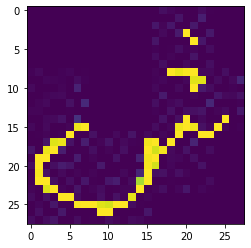

Prediction:  ء
Actual Result


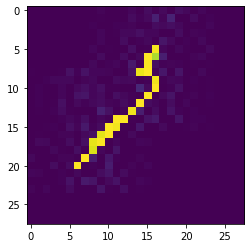

Prediction:  ر
Actual Result


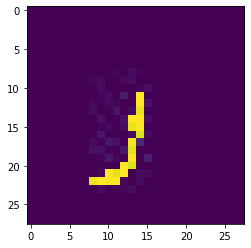

Prediction:  ٹ
Actual Result


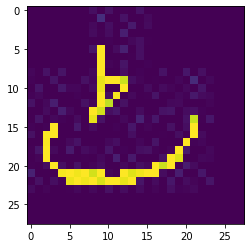

Prediction:  ی
Actual Result


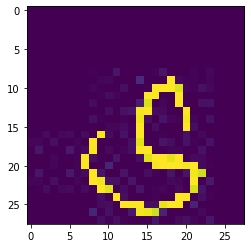

In [ ]:
import random

def showImage(image):
  plot.imshow(image, interpolation='nearest')
  plot.show()

def showRandomPredictions(predictions,images):
    count = 10
    for c in range(count):
        i = random.randrange(predictions.size)
        print("Prediction: ",Index_Mapping.get(predictions[i]))
        print("Actual Result")
        showImage(images[i].reshape(28,28))
        print("============================================================")
    return


showRandomPredictions(Y_pred,X_valid)


In [ ]:
!pip install keract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


conv2d_15_input (1, 28, 28, 1) 


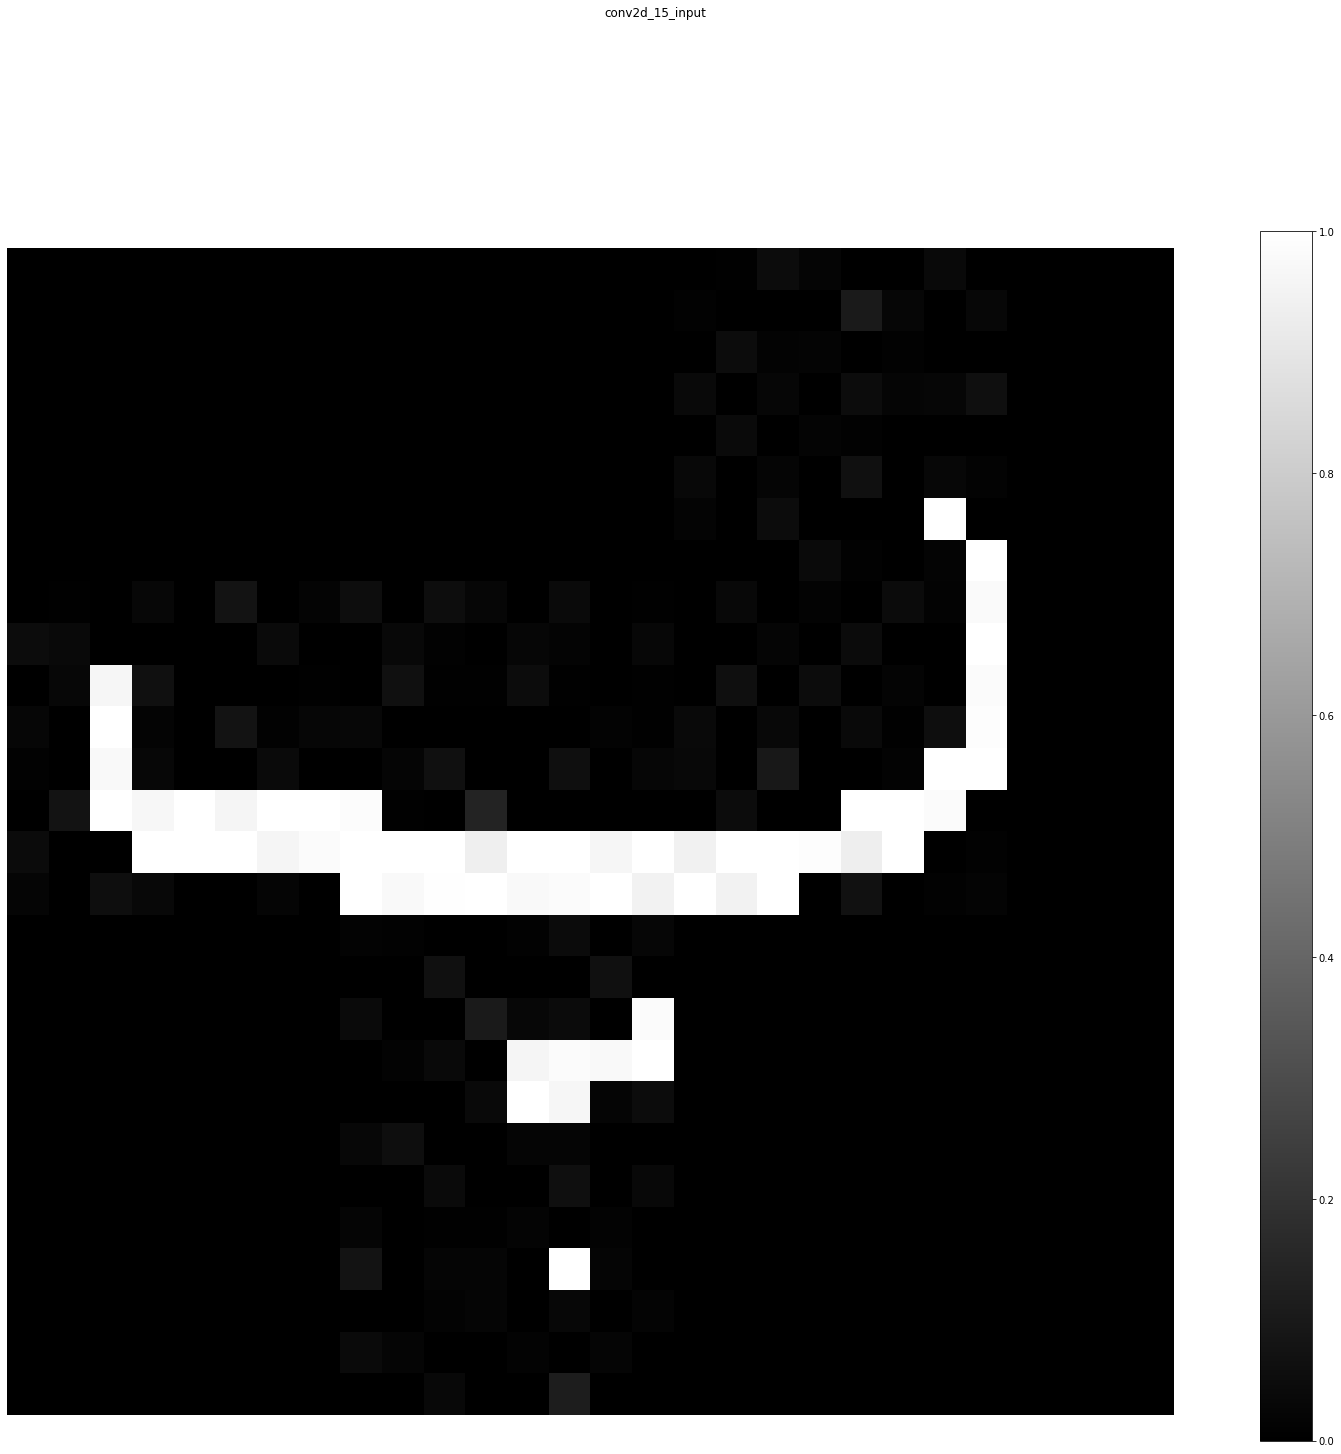

conv2d_15 (1, 26, 26, 16) 


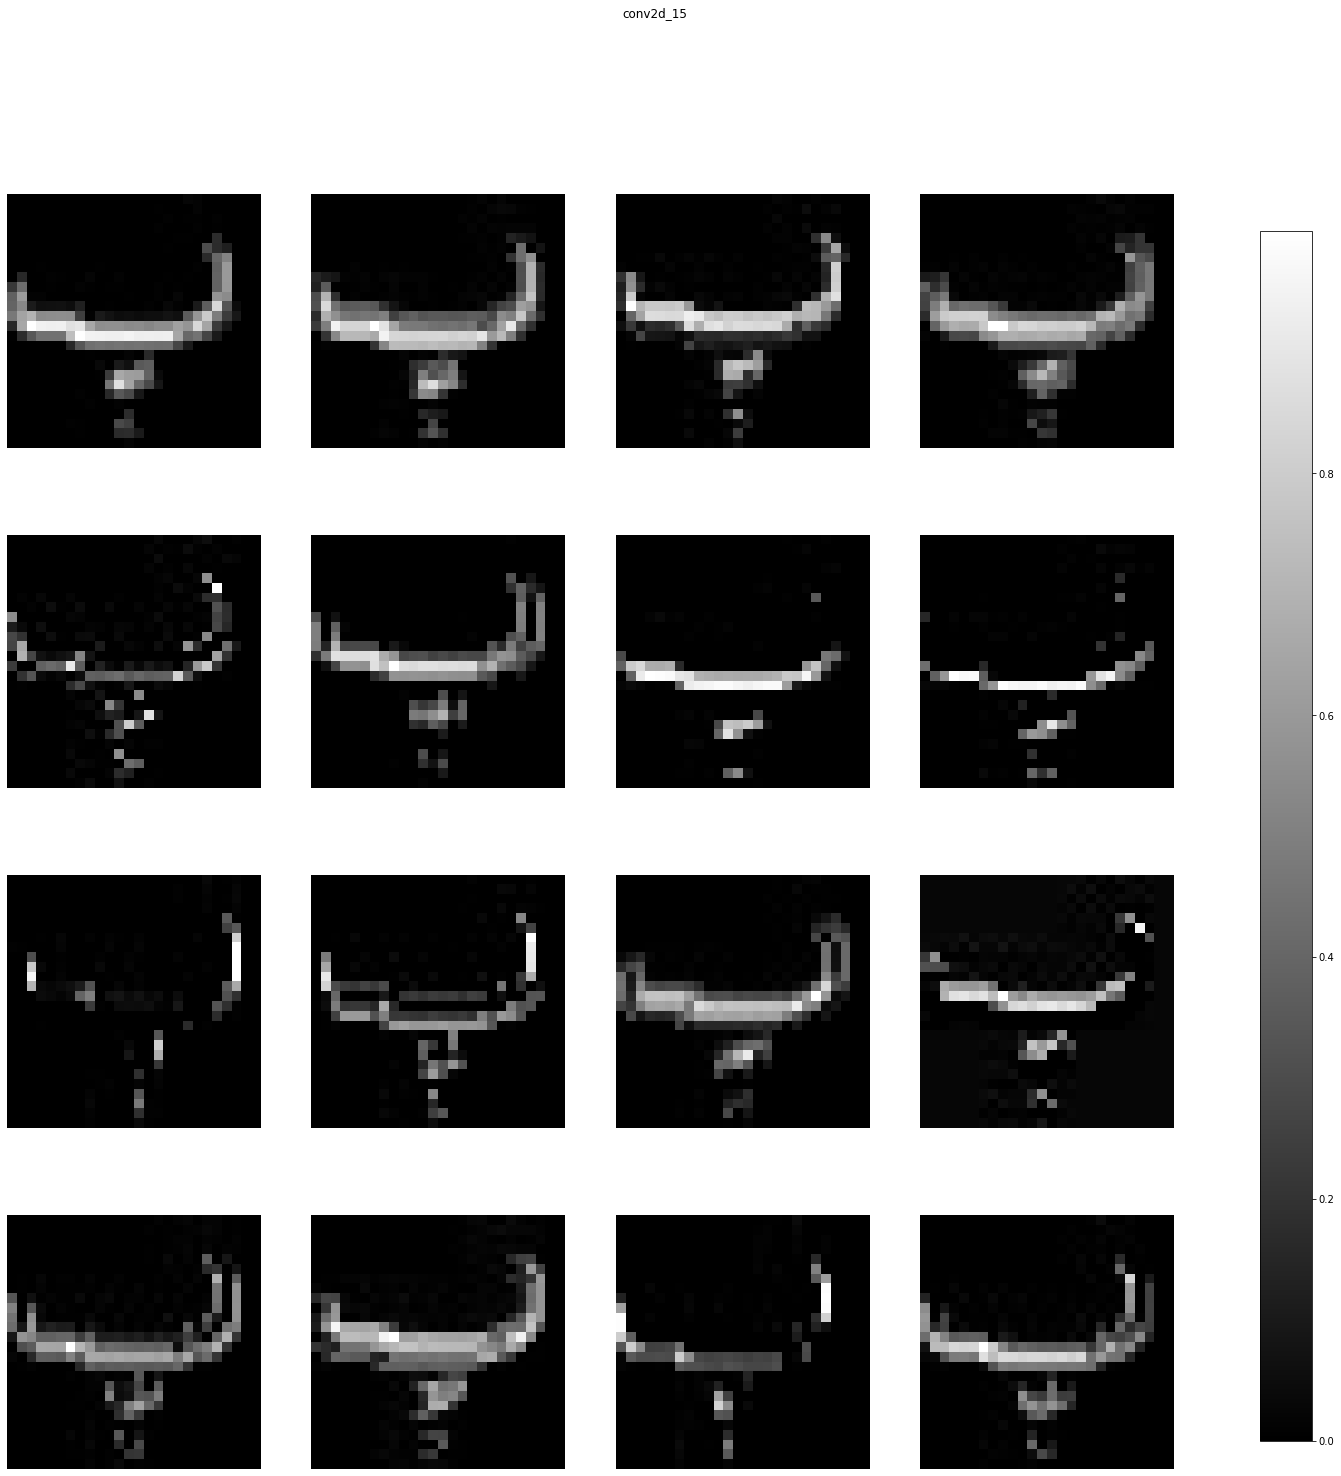

max_pooling2d_10 (1, 13, 13, 16) 


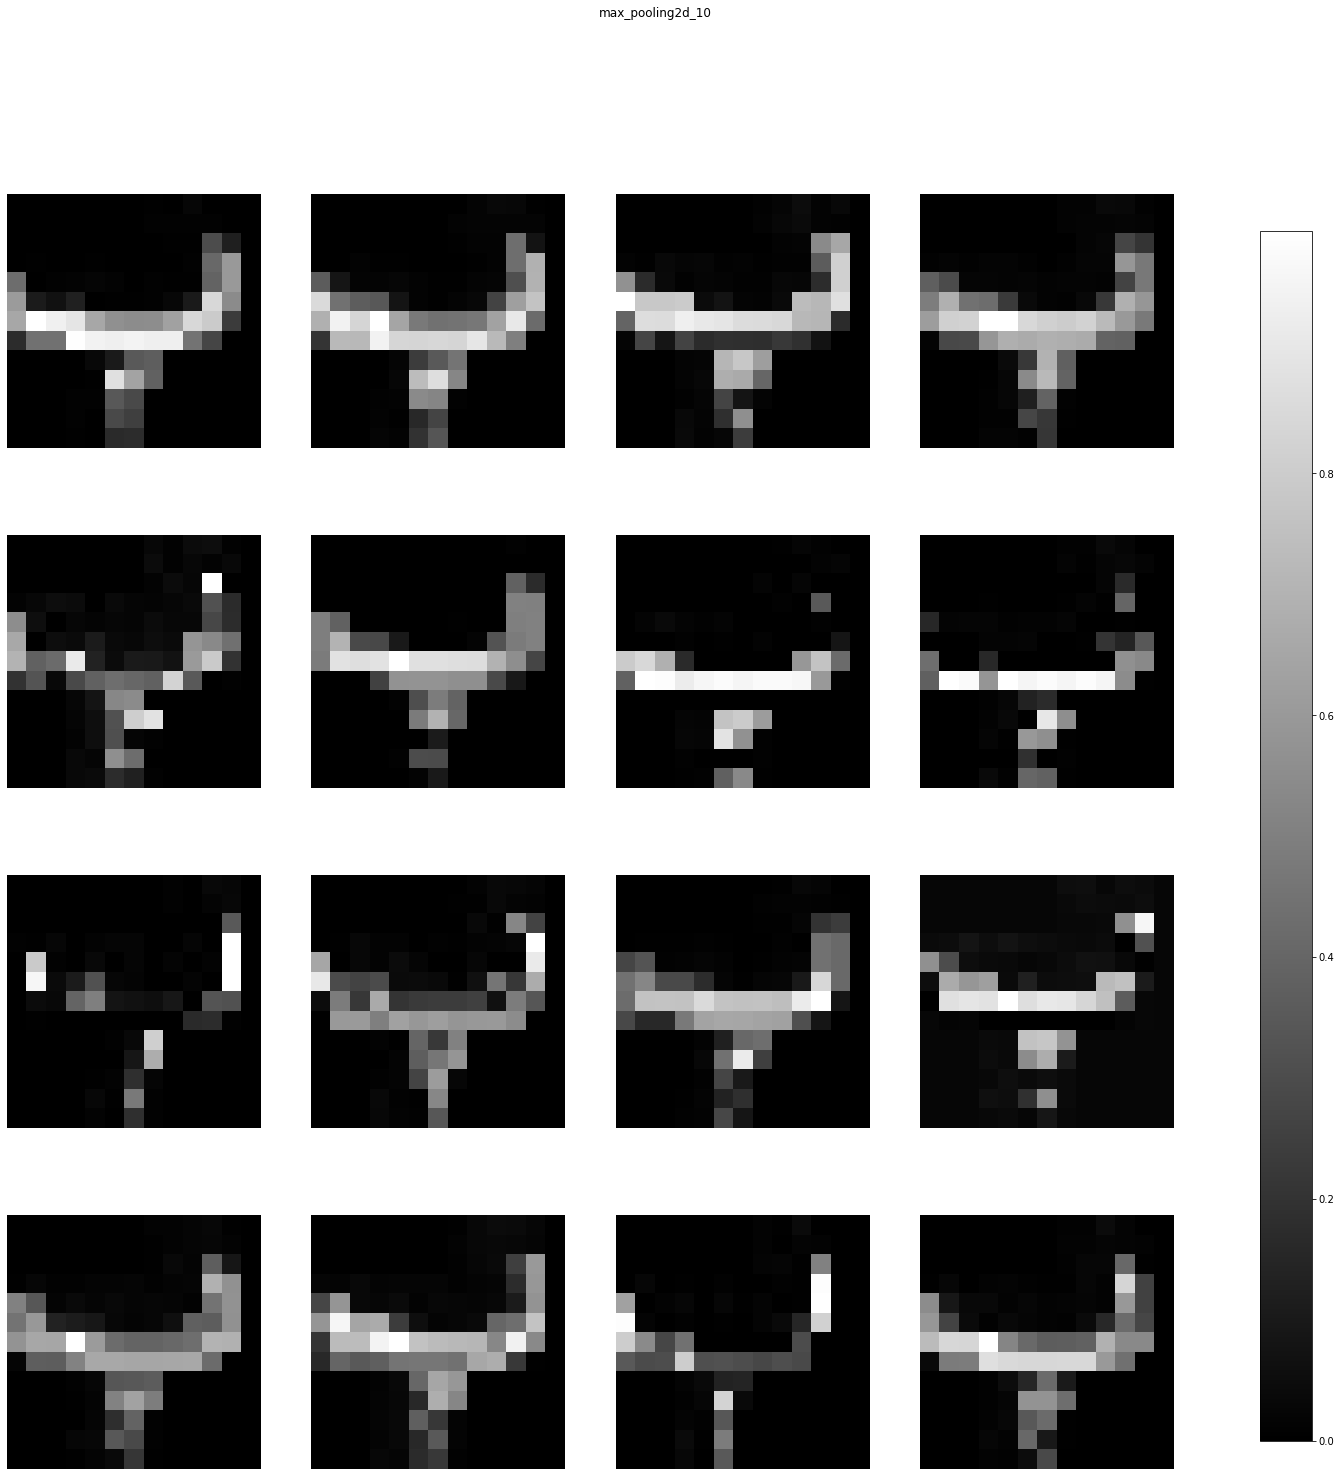

conv2d_16 (1, 11, 11, 32) 


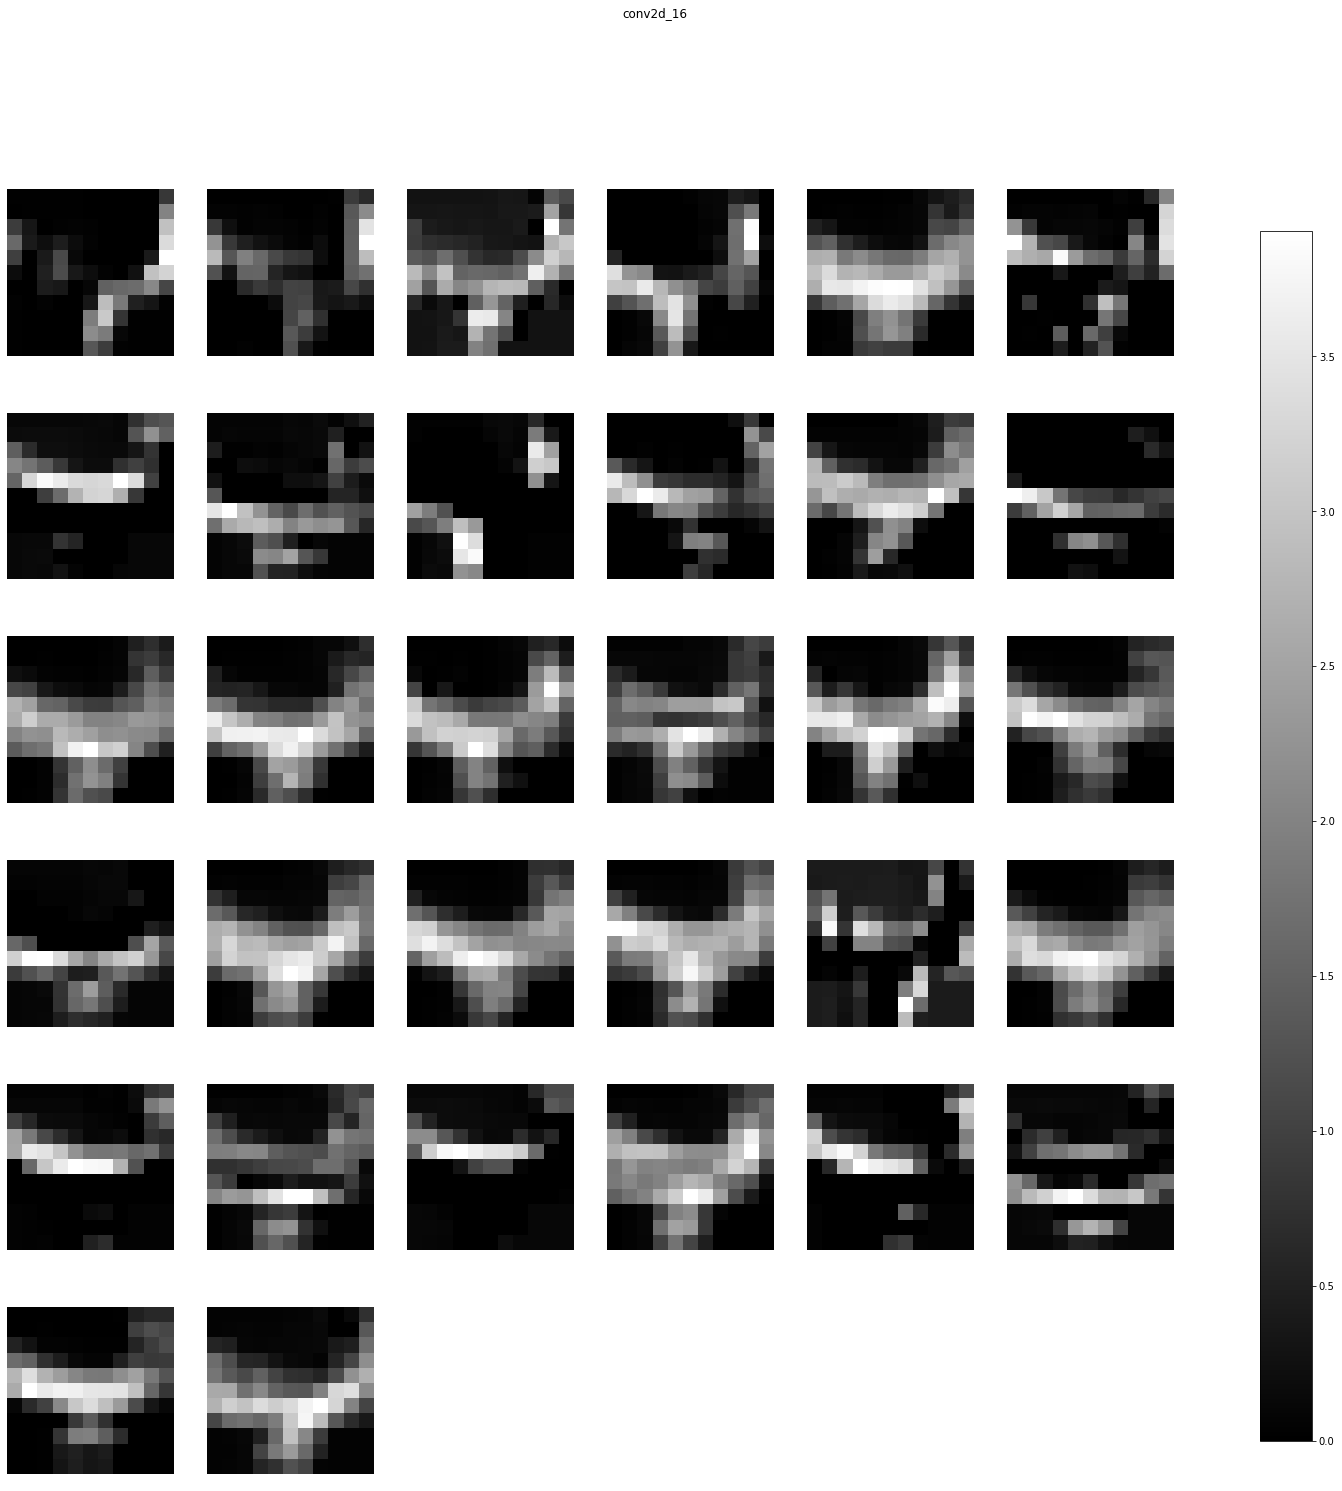

max_pooling2d_11 (1, 5, 5, 32) 


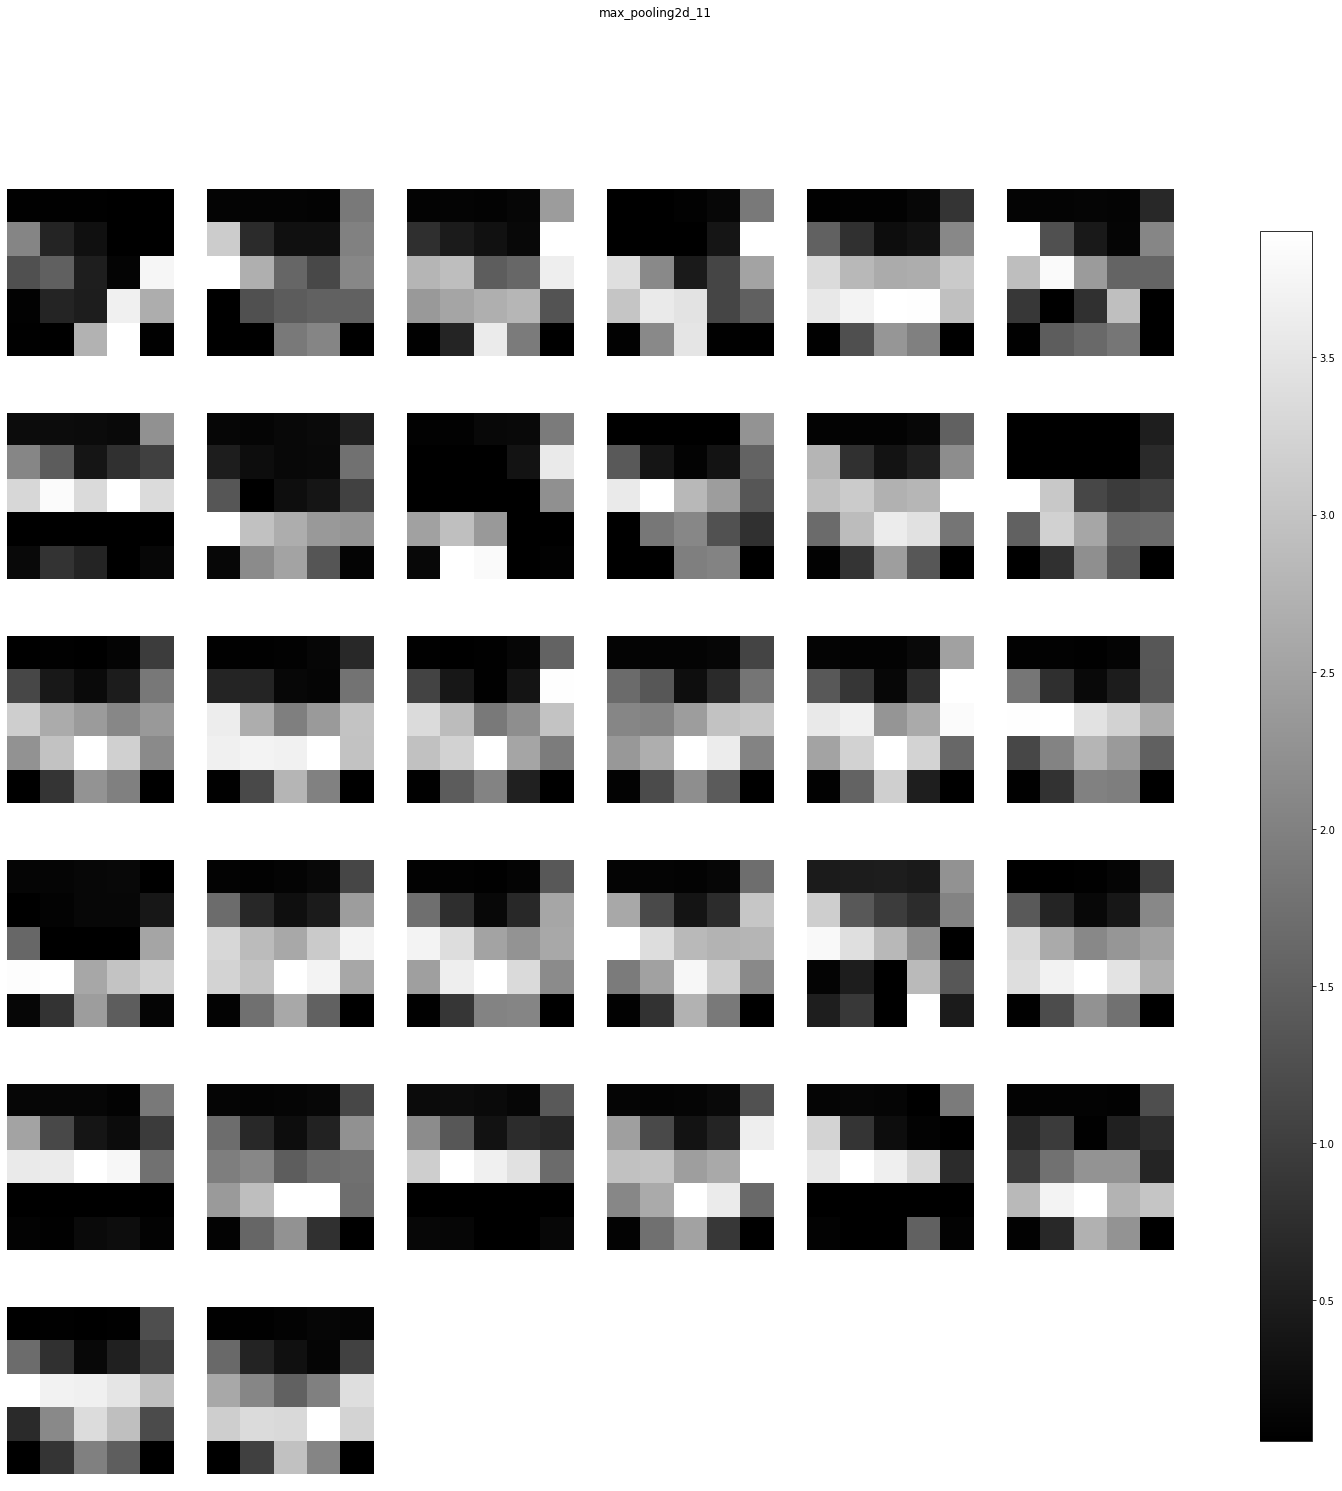

conv2d_17 (1, 3, 3, 32) 


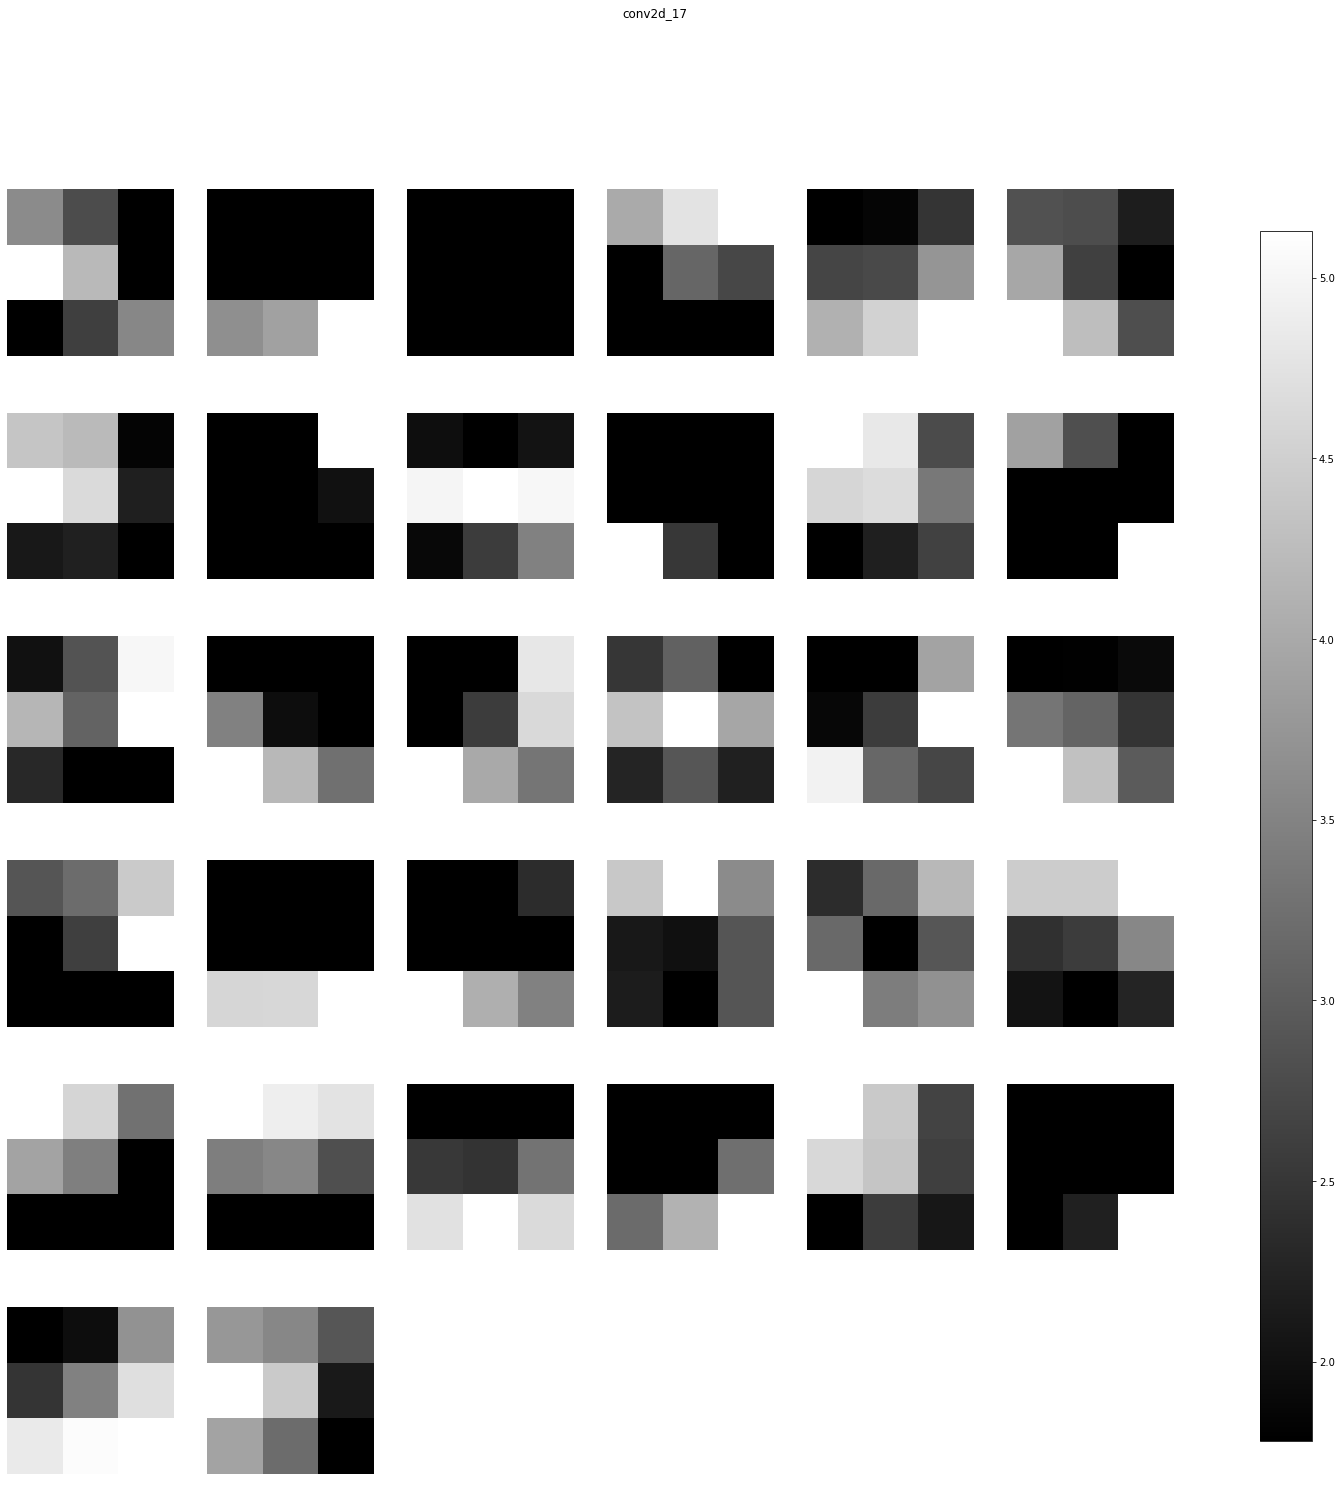

flatten_5 (1, 288) 


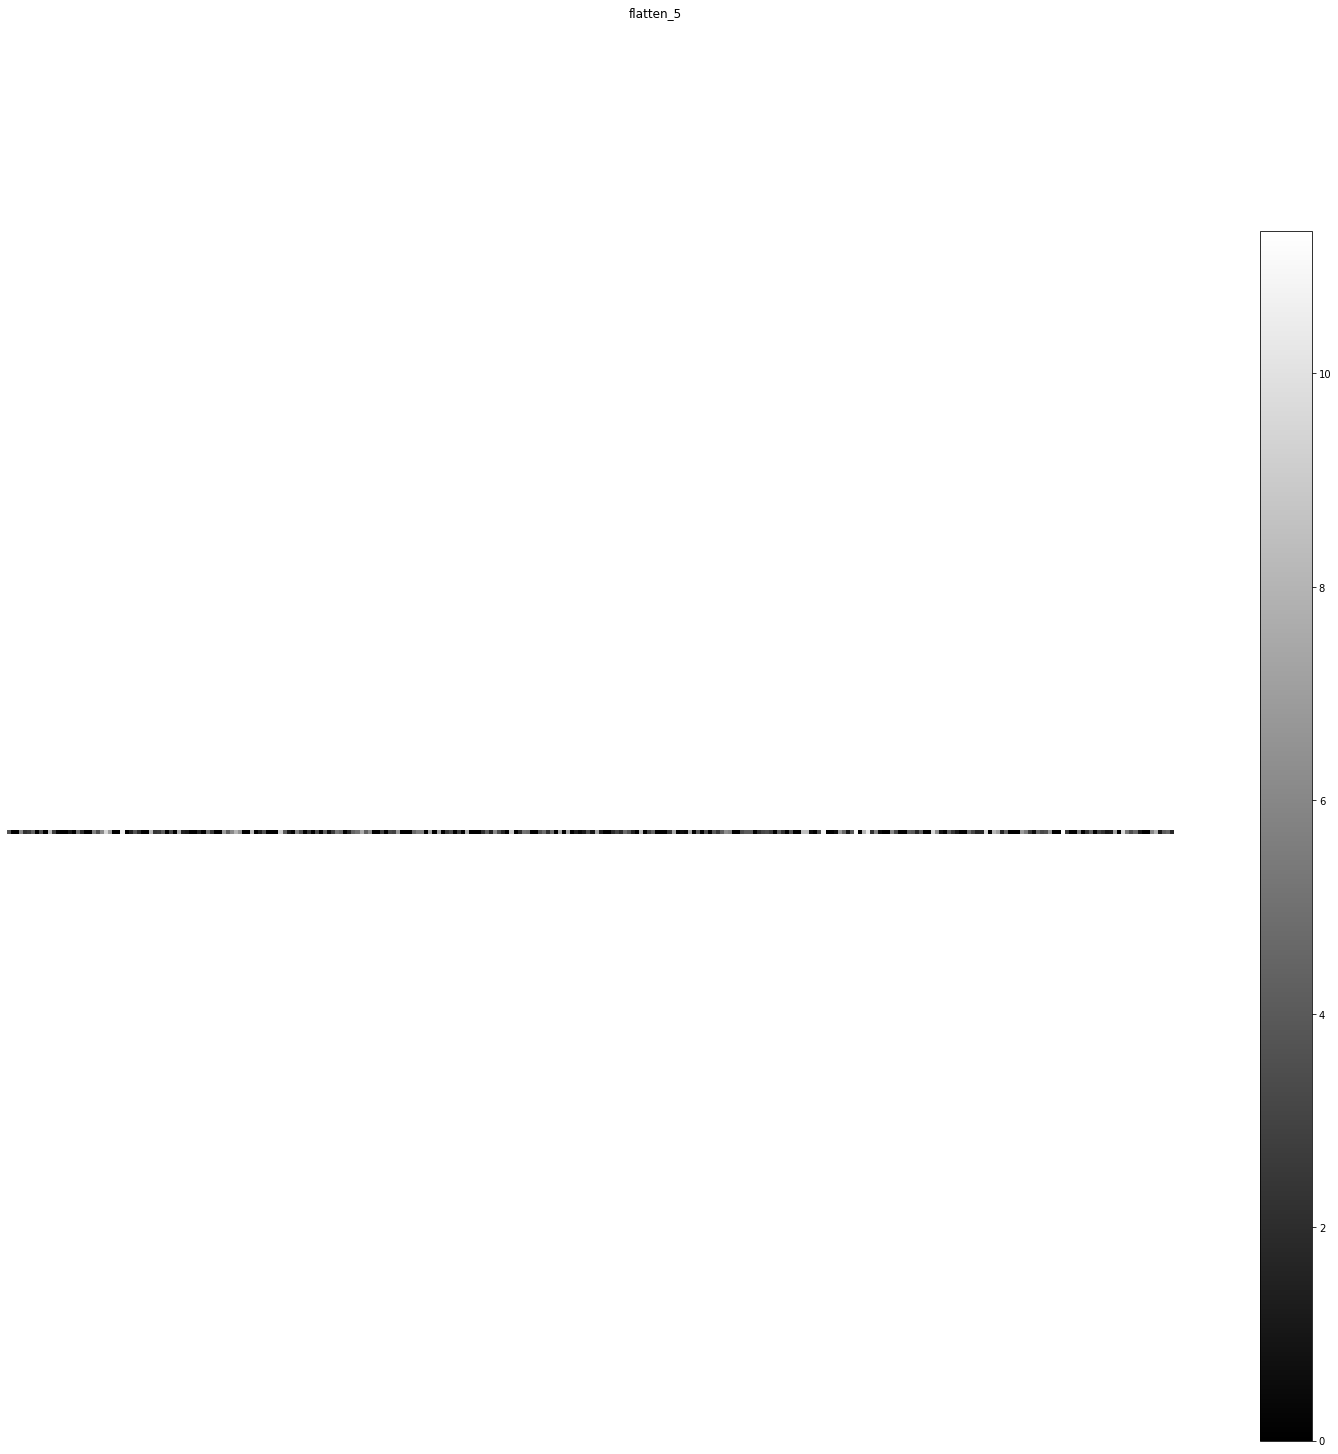

dense_10 (1, 128) 


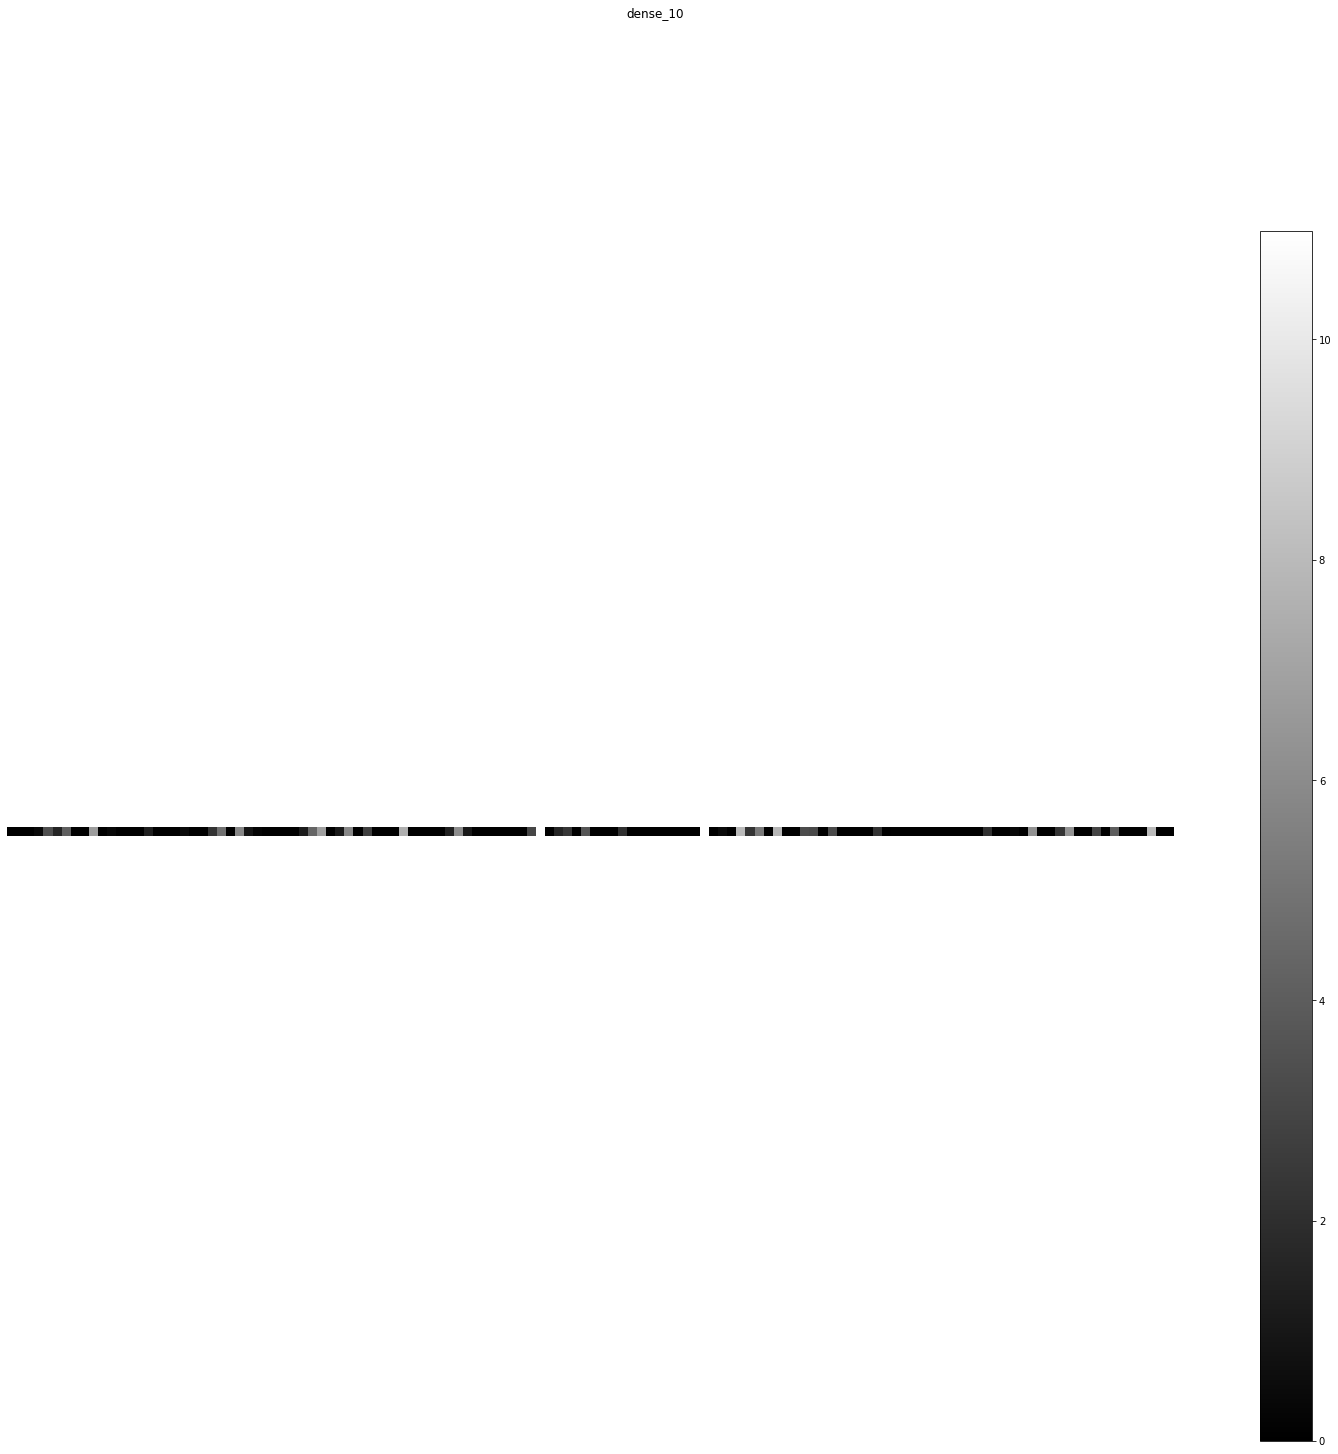

dropout_5 (1, 128) 


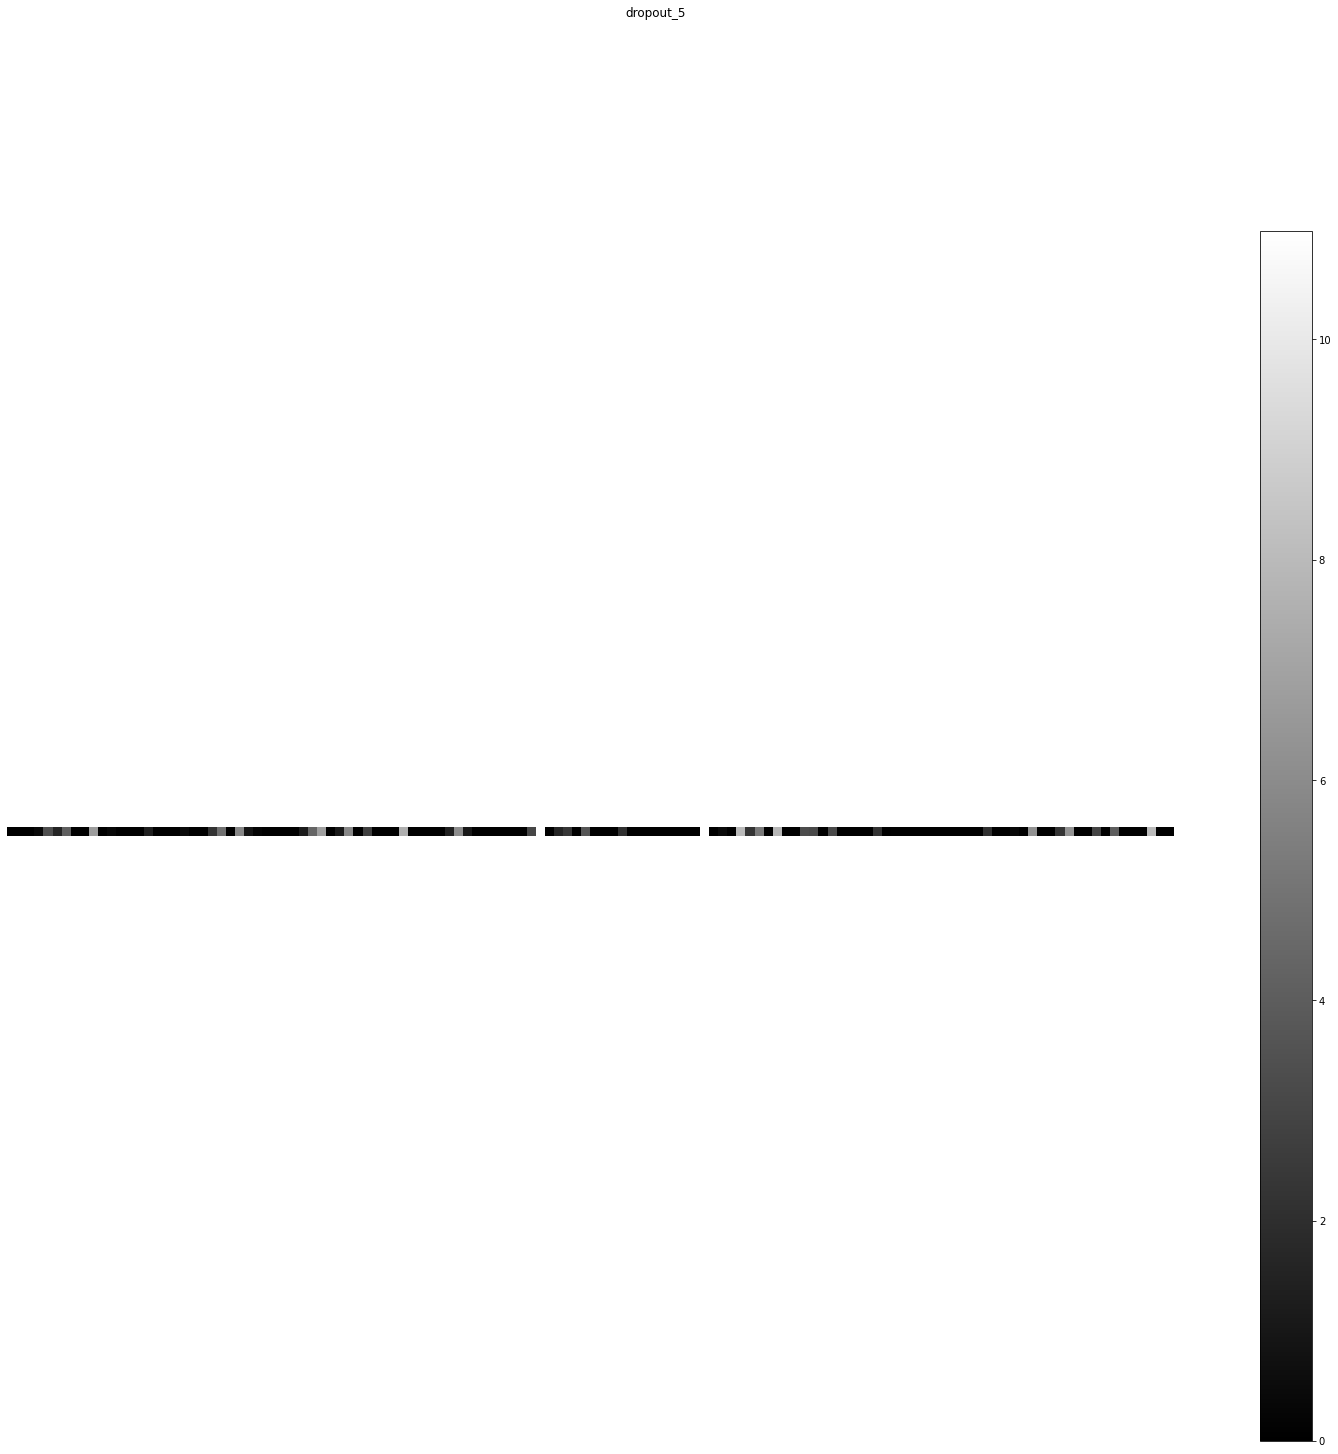

dense_11 (1, 40) 


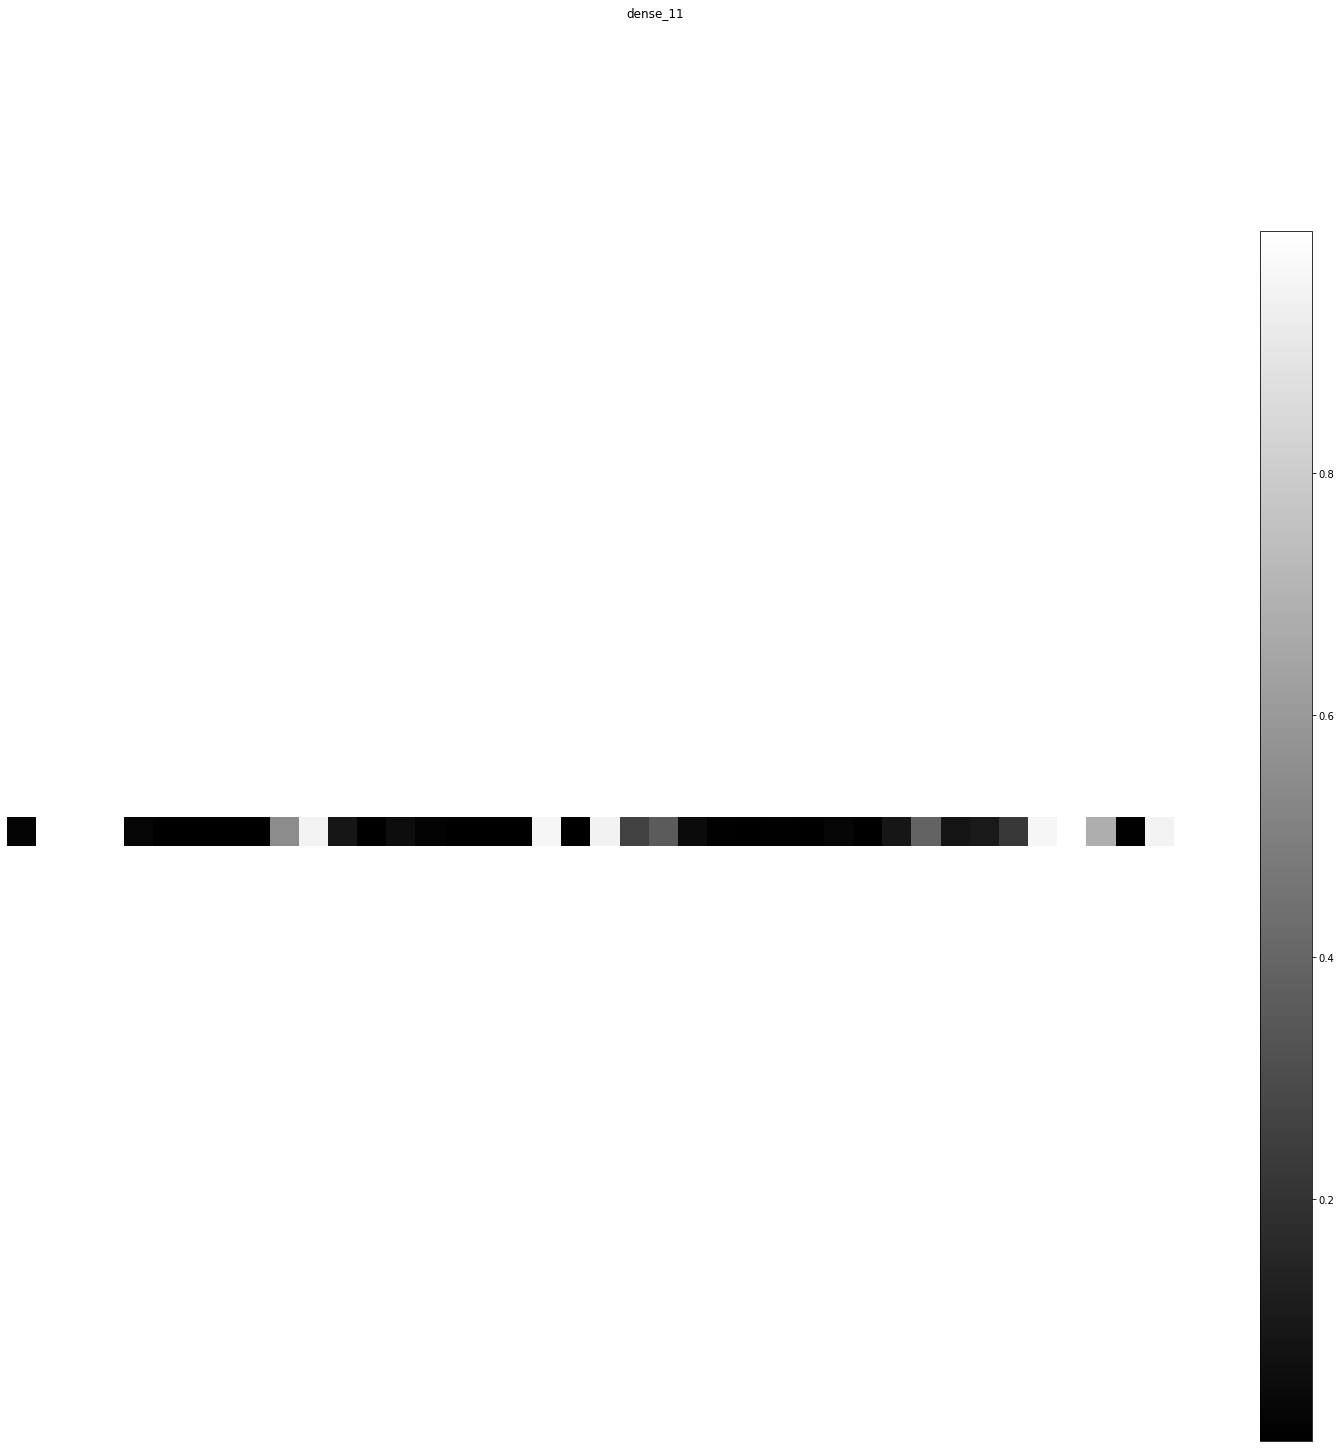

In [ ]:
from keract import get_activations, display_activations

test_image_no = 450

keract_inputs = X_valid[test_image_no:test_image_no+1,:,:,np.newaxis]
keract_targets = Y_valid[1]
activations = get_activations(net, keract_inputs)
display_activations(activations, cmap="gray", save=False)